# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra

### Kelompok 4 (TI 3A)

#### Afrizal Dwi Septian / 2241720122 (Absen 1)

#### Farid Fitriansah Alfarizi / 2241720055 (Absen 12)

#### Habibatul Mustofa / 2241720211 (Absen 14)

#### Yogianna Nur Febrianti / 2241720261 (Absen 28)

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


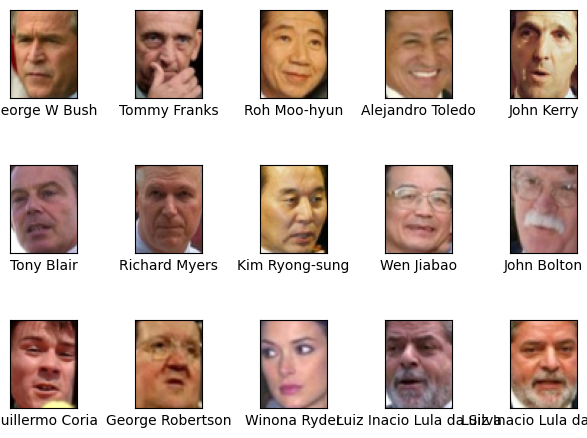

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

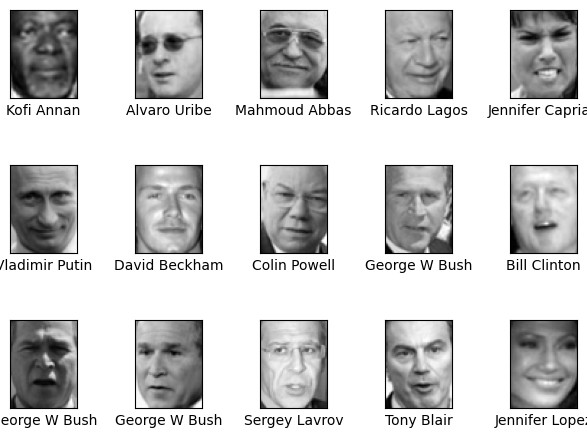

In [ ]:
# Import library yang diperlukan
from skimage.color import rgb2gray

# Convert the color images to grayscale
faces_gray = np.array([rgb2gray(img) for img in faces.images])

# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces_gray)) for x in range(0, 15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    # Show grayscale images
    axi.imshow(faces_gray[rand_labels[i]], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

plt.show()

- Pra-pengolahan data dengan mengkonversi gambar ke format grayscale, yang mengurangi dimensi data dan memudahkan analisis 15 gambar dari dataset, ditampilkan untuk memverifikasi bahwa konversi ke grayscale dengan label yang menunjukkan identitas dari masing-masing gambar

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

'\n    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.\n    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.\n\n    Hints:\n        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,\n        Anda dapat menggunakan fungsi np.histrogram dari library numpy\n'

In [ ]:
def extract_histogram_features_gray(image, bins=256):
    # Ekstraksi histogram untuk citra grayscale
    hist, _ = np.histogram(image, bins=bins, range=(0, 256))
    return hist

# Ekstraksi fitur untuk semua gambar
X_features = np.array([extract_histogram_features_gray(img) for img in faces_gray])

print(X_features.shape)

(4324, 256)


# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

'\n    Pada bagian ini lakukan proses pembuatan model,\n\n    1. Pembuatan data training dan data testing\n    2. Pembuatan objek model\n    3. Proses fitting model\n'

In [ ]:
# Pembuatan data training dan data testing
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Pembuatan objek model
svm_model = SVC(kernel='linear')  # Ubah kernel sesuai kebutuhan

# Proses fitting model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

'\n    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing\n    dengan menggunakan metric akurasi dan juga classfication report\n\n    Hints:\n        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5\n'

In [ ]:
# Prediksi dan evaluasi
y_pred_test = svm_model.predict(X_test)

# Evaluasi akurasi
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi akurasi
print(f'Hasil akurasi data test: {acc_test * 100:.2f}%')

# Classification report untuk data testing
print("\nClassification Report (Testing Data):")
unique_labels = np.unique(np.concatenate((y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test, target_names=faces.target_names[unique_labels], labels=unique_labels))

Hasil akurasi data test: 11.45%

Classification Report (Testing Data):
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.00      0.00      0.00         2
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.00      0.00      0.00        15
    Arnold Schwarzenegger       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


-  Evaluasi menghitung akurasi model pada data testing dan menghasilkan laporan klasifikasi yang memberikan wawasan lebih dalam mengenai performa model dalam mengidentifikasi kelas (wajah individu) dalam dataset.

# Challenge

- Preparation

In [ ]:
# Load required library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from skimage.feature import hog

- Load Data

In [ ]:
# Load Dataset
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

- Preprocessing

  Ekstraksi Mean Features: Kami mengganti ekstraksi histogram dengan ekstraksi fitur HOG (Histogram of Oriented Gradients) untuk mendeteksi objek dalam gambar, khususnya untuk mendeteksi bentuk dan tepi.

In [ ]:
# Ekstraksi HOG dari gambar RGB
def extract_hog_features(image):
    # Konversi ke grayscale
    gray_image = rgb2gray(image)
    # Ekstraksi fitur HOG
    hog_features = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    return hog_features

- Features Extraction

In [ ]:
# Ekstraksi fitur untuk semua gambar
X_features = np.array([extract_hog_features(img) for img in faces.images])

# Pembuatan data training dan data testing
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

- Build Model

   LogisticRegression: Model SVM diganti dengan LogisticRegression yang menggunakan metode regresi logistik untuk klasifikasi.

In [ ]:
# Pembuatan objek model
logistic_model = LogisticRegression(max_iter=1000)  # Tambahkan iterasi maksimum jika diperlukan

# Proses fitting model
logistic_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_test = logistic_model.predict(X_test)

- Evaluation

- Menghitung akurasi model pada data

In [ ]:
# Evaluasi akurasi
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi akurasiiya
print(f'Hasil akurasi data test: {acc_test * 100:.2f}%')

Hasil akurasi data test: 49.60%


Hasilnya : akurasi adalah 49.60%, itu menunjukkan bahwa model hanya berhasil memprediksi dengan benar 49.60% dari data pengujian.

- Classification report menampilkan metrik precision, recall, dan F1-score untuk setiap kelas.

In [ ]:
# Classification report untuk data testing
print("\nClassification Report (Testing Data):")
unique_labels = np.unique(np.concatenate((y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test, target_names=faces.target_names[unique_labels], labels=unique_labels))


Classification Report (Testing Data):
                           precision    recall  f1-score   support

             Abdullah Gul       1.00      0.40      0.57         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.14      1.00      0.25         2
             Alvaro Uribe       0.50      0.43      0.46         7
          Amelie Mauresmo       1.00      0.17      0.29         6
             Andre Agassi       0.14      0.50      0.22         2
             Andy Roddick       1.00      0.50      0.67         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.67      0.50      0.57         4
             Ariel Sharon       0.47      0.60      0.53        15
    Arnold Schwarzenegger       0.67      0.27      0.38        15
     Atal Bihari Vajpa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Hasilnya : Memberikan metrik lebih rinci mengenai kinerja model.

- Confusion Matrix gambaran tentang kinerja model dalam bentuk matriks yang membandingkan prediksi model dengan nilai sebenarnya.

- Plot confusion matrix memperlihatkan distribusi hasil prediksi dan nilai sebenarnya untuk setiap kelas dalam bentuk heatmap.

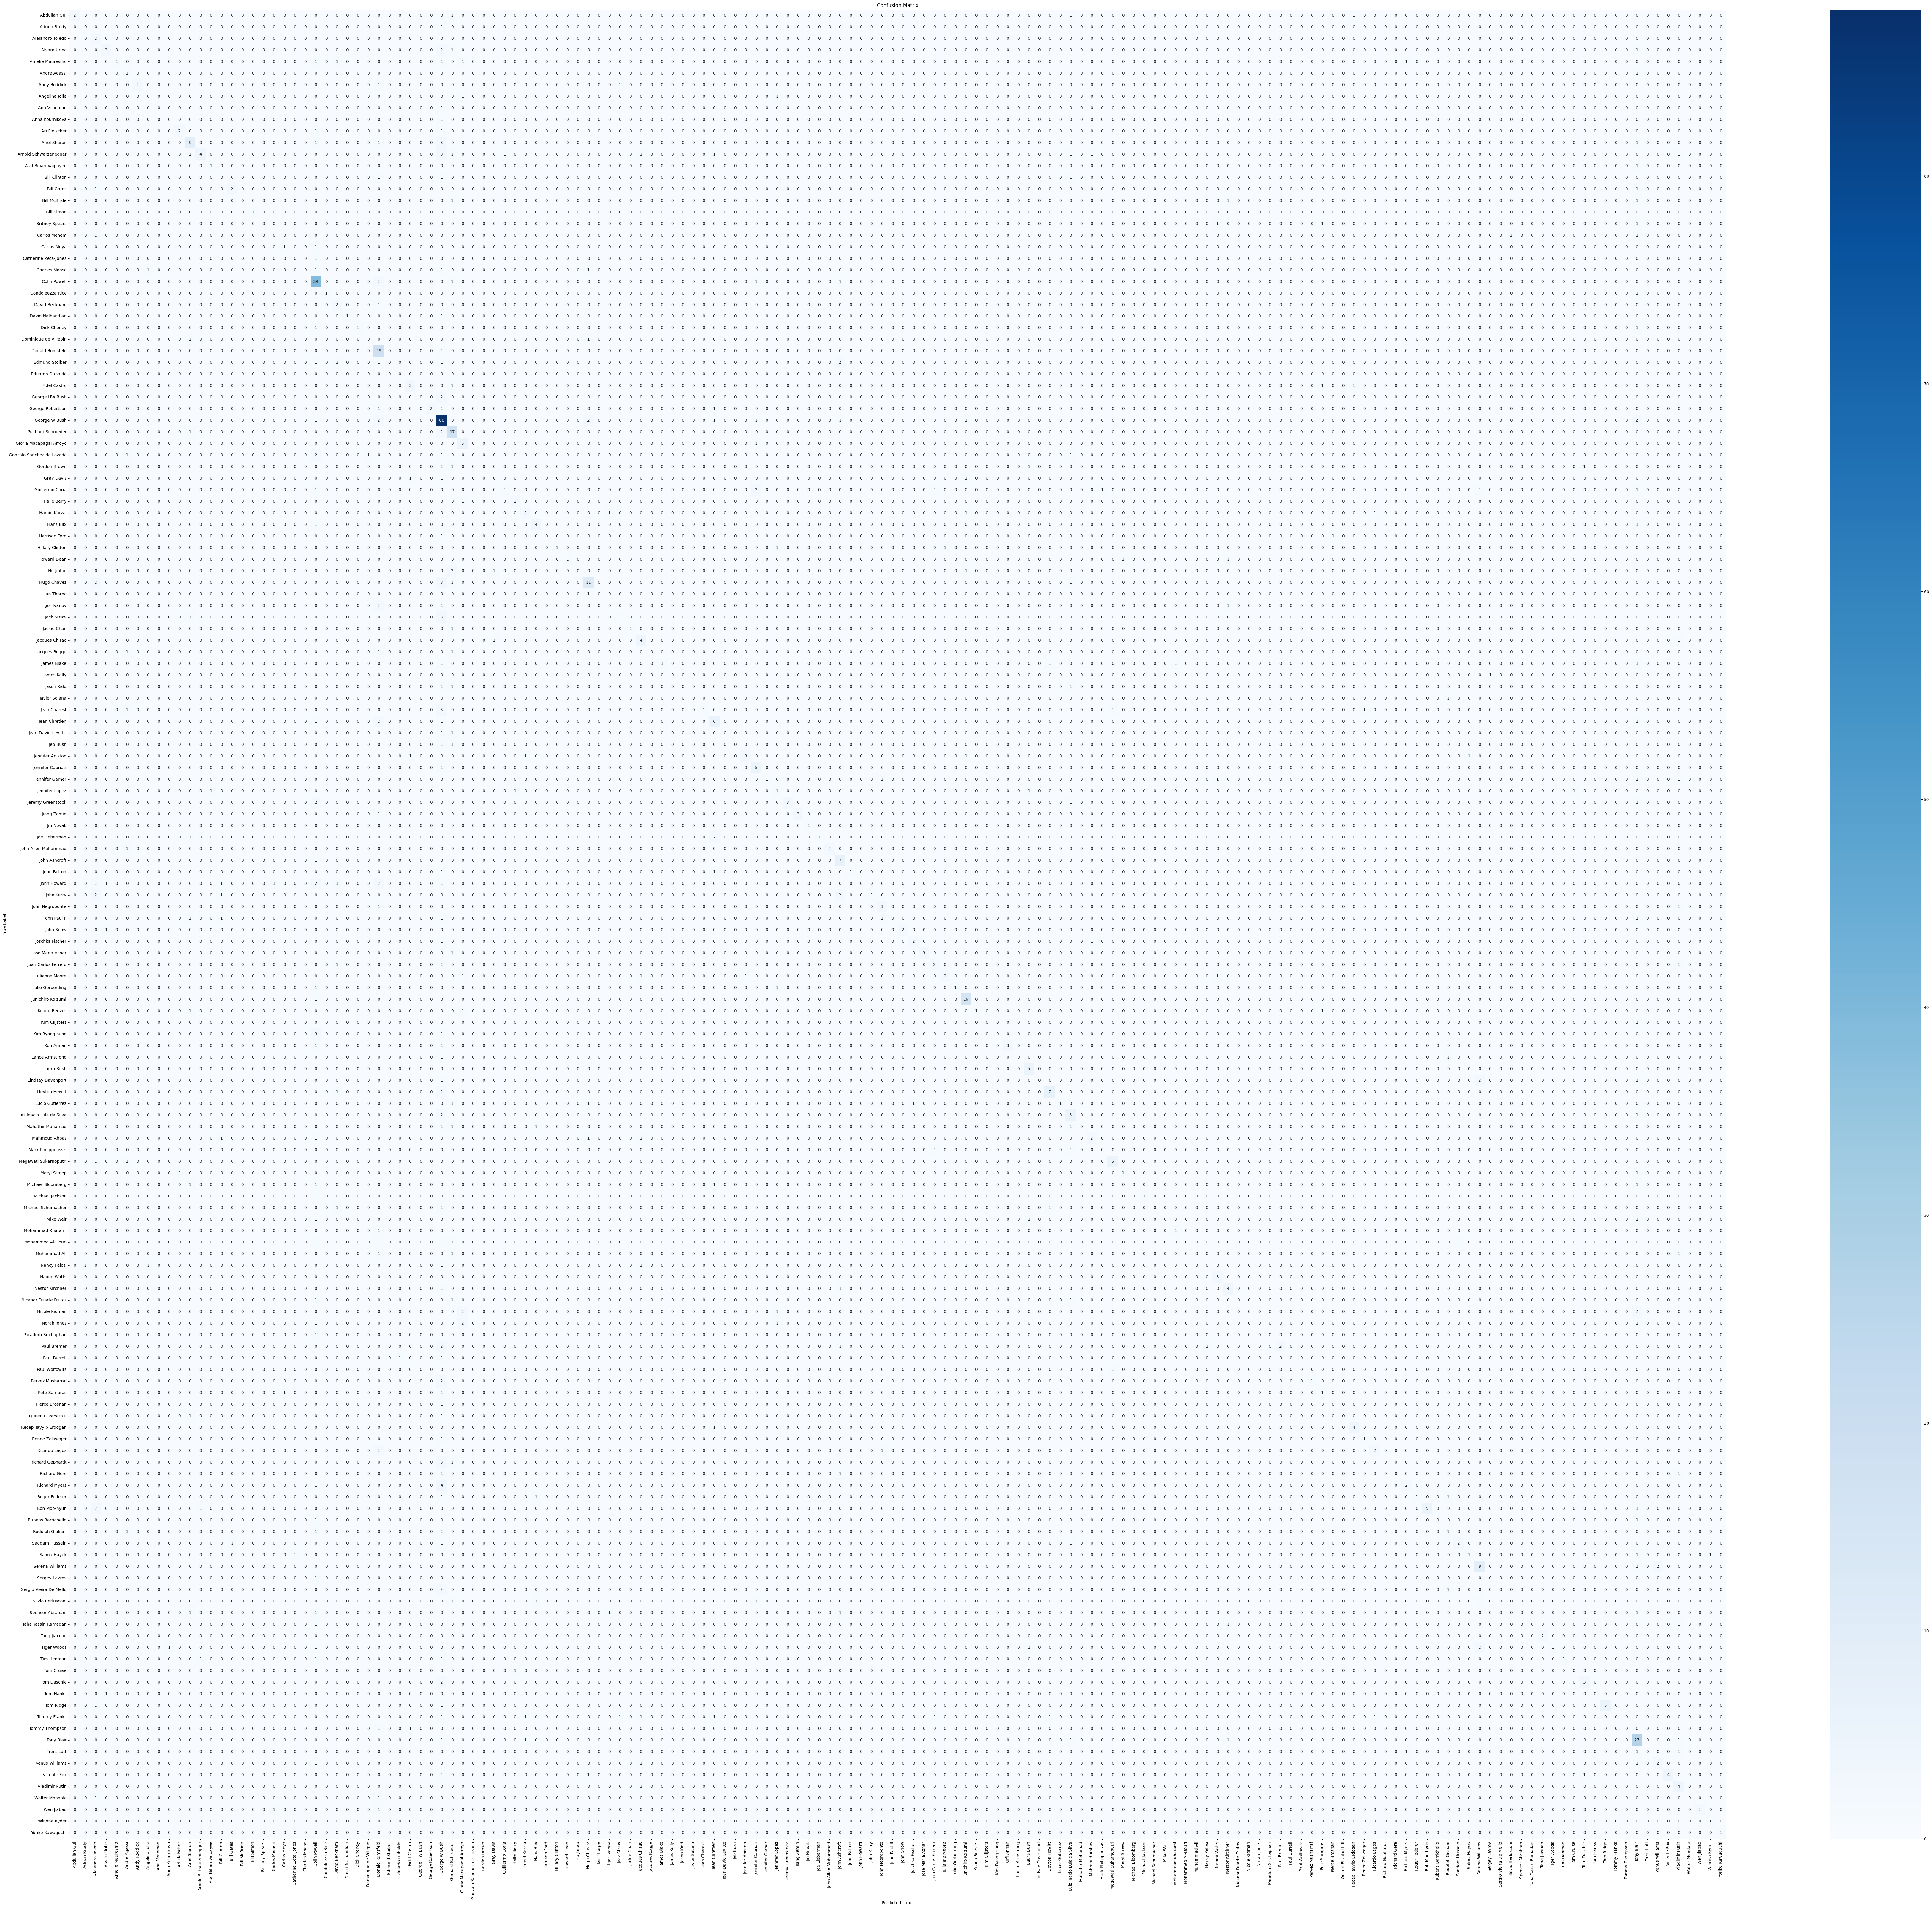

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
plt.figure(figsize=(90, 80))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Hasilnya : Visualisasi dari confusion matrix memberikan gambaran tentang seberapa baik model melakukan klasifikasi untuk setiap individu dalam dataset.

  Dikarenakan data terlalu banyak, analisis model dapat menjadi rumit dan membingungkan saat menggunakan confusion matrix, sehingga diperlukan pendekatan yang lebih sistematis untuk meningkatkan pemahaman tentang kinerja model.